# Домашнее задание 6

•По возможности, найдите два признака в Ваших данных с
более или менее «линейным» полем рассеяния;
представьте его на графике.

• Постройте уравнение линейной регрессии одного из этих
признаков через другой признак. Сделайте комментарий о
смысле величины регрессионного коэффициента при этом
другом признаке.

• Найдите значения коэффициентов корреляции и
детерминации; сделайте комментарий о смысле величины
последнего.

• Сделайте предсказание величины целевого признака на
двух-трех объектах; прокомментируйте результат.

• Рассчитайте среднюю относительную ошибку регрессионного уравнения на всех объектах Вашей таблицы данных и
сравните ее с величиной коэффициента детерминации.

## Решение:

Для начала загрузим все данные.

In [79]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import math

data = pandas.read_csv('../data/RoadSafetyData_Accidents_2018.csv')
data.head()

,Unnamed: 0,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Carriageway_Hazards,Urban_or_Rural_Area,Longitude,Latitude
0,1,3,2,2,01/01/2018,2,01:30,3,30,4,1,1,0,1,-0.139737,51.524587
1,2,3,1,1,01/01/2018,2,00:50,6,30,4,1,1,0,1,0.046471,51.539651
2,3,3,2,1,01/01/2018,2,00:45,6,20,4,1,1,0,1,-0.102474,51.529746
3,4,2,2,1,01/01/2018,2,03:00,3,30,4,2,2,0,1,0.037828,51.530179
4,5,2,2,2,01/01/2018,2,02:20,6,30,4,1,2,0,1,0.065781,51.469258


In [80]:
data.columns

Index(['Unnamed: 0', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time', 'Road_Type',
       'Speed_limit', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Carriageway_Hazards', 'Urban_or_Rural_Area',
       'Longitude', 'Latitude'],
      dtype='object')

Так как я уже знаю какие у меня признаки(по предыдущим дз), то я уже могу сказать что признаков с более или менее «линейным» полем рассеяния нет в моем наборе данных.

Но для нагляности убедимся в этом. Построим график корреляций:

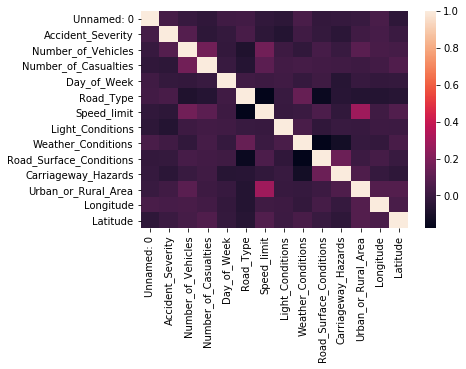

In [81]:
import seaborn as sns
sns.heatmap(data.corr());


Чего и требовалось доказать. Признаков с более или менее «линейным» полем рассеяния нет. 

Единственное что бросается в глаза - небольшая зависимость(очень небольшая) признков 'Urban_or_Rural_Area' и 'Speed_limit'

Попробуем немного сократить наш набор данных, так как 2000 объектов - многовато.

In [82]:
rural_data = data[data['Urban_or_Rural_Area'] == 2]

In [83]:
data.drop(data.tail(data.shape[0] - 60).index, inplace=True)
data.drop(data[data['Urban_or_Rural_Area'] == 2].index, axis=0)
data = data.append(rural_data)

In [84]:
data.head()

,Unnamed: 0,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Carriageway_Hazards,Urban_or_Rural_Area,Longitude,Latitude
0,1,3,2,2,01/01/2018,2,01:30,3,30,4,1,1,0,1,-0.139737,51.524587
1,2,3,1,1,01/01/2018,2,00:50,6,30,4,1,1,0,1,0.046471,51.539651
2,3,3,2,1,01/01/2018,2,00:45,6,20,4,1,1,0,1,-0.102474,51.529746
3,4,2,2,1,01/01/2018,2,03:00,3,30,4,2,2,0,1,0.037828,51.530179
4,5,2,2,2,01/01/2018,2,02:20,6,30,4,1,2,0,1,0.065781,51.469258


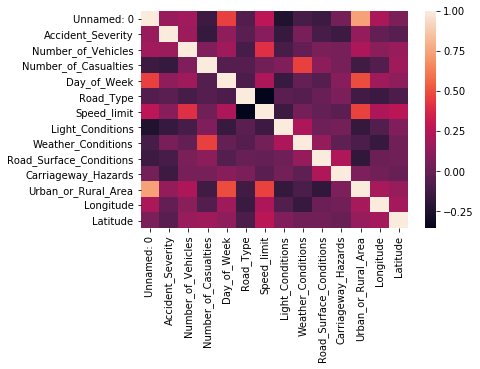

In [85]:
sns.heatmap(data.corr());

Не особо помогло. 

 Тогда возьмемем из того, что есть. Это будут признаки Number_of_Vehicles и Speed_limit. Понимаю, что теоретически нет никакой зависимости, но для нашего набора это лучший вариант.

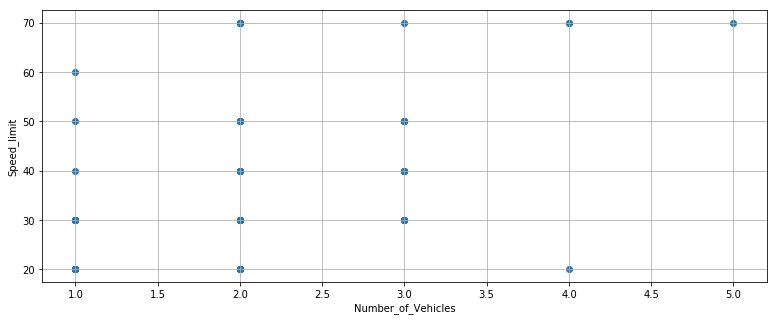

In [86]:
f, (ax2) = plt.subplots(1, 1, figsize=(13, 5))
ax2.scatter(data['Number_of_Vehicles'].values, data['Speed_limit'].values)
ax2.set_xlabel('Number_of_Vehicles')
ax2.set_ylabel("Speed_limit")
ax2.grid()

Так себе график, но повторюсь, в нашем наборе нет другого выбора.

### Теперь построим уравнение регрессии

In [87]:
import sklearn.linear_model as lm
regression = lm.LinearRegression()
regression.fit(data['Number_of_Vehicles'].values.reshape(-1, 1), data['Speed_limit'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [88]:
regression.coef_

array([7.61592121])

In [89]:
regression.intercept_

19.625222267815612

Получили уравнение: $X_{Speed limit} = X_{Number of Vehicles} * 7.61592121 + 19.625222267815612$

Это никак не совпадает с жизнеными реалиями, но это уравнени значит что при умноженнии числа транспортых средств в аврии на 7.61592121 и прибавлении числа 19.625222267815612 - мы получим скоростное ограничение того места, где была авария.

### Теперь посчитаем значения коэффициентов корреляции и детерминации

In [90]:
print('коэффициент корреляции равен ', data.corr()['Speed_limit']['Number_of_Vehicles'])

коэффициент корреляции равен  0.4103443701045131


In [92]:
from sklearn.metrics import r2_score
print('коэффициент детерминации равен ', \
    regression.score(data['Number_of_Vehicles'].values.reshape(-1, 1), data['Speed_limit'].values))

коэффициент детерминации равен  0.1683825020764692


Мы получили очень низкий коэффициент детерминации(всего 16%). Этим мы убедились в том, что никакой зависимости Speed_limit от Number_of_Vehicles - нет! Но так как это был единственный нормальный вариант для наших данных - попробовать стоило.

### Теперь сделаем предсказание величины целевого признака на двух-трех объектах

А чтобы убедиться в неадекватности нашей модели - приведём пример трёх "хороших" предсказаний и трёх "плохих".

In [93]:
regression.predict(data['Number_of_Vehicles'].values.reshape(-1, 1))

array([34.8570647 , 27.24114348, 34.8570647 , 34.8570647 , 34.8570647 ,
       34.8570647 , 34.8570647 , 42.47298591, 34.8570647 , 34.8570647 ,
       27.24114348, 27.24114348, 34.8570647 , 34.8570647 , 27.24114348,
       34.8570647 , 34.8570647 , 34.8570647 , 34.8570647 , 34.8570647 ,
       27.24114348, 27.24114348, 27.24114348, 34.8570647 , 34.8570647 ,
       34.8570647 , 34.8570647 , 34.8570647 , 27.24114348, 27.24114348,
       34.8570647 , 34.8570647 , 34.8570647 , 27.24114348, 34.8570647 ,
       27.24114348, 34.8570647 , 34.8570647 , 34.8570647 , 34.8570647 ,
       34.8570647 , 27.24114348, 42.47298591, 42.47298591, 34.8570647 ,
       34.8570647 , 34.8570647 , 27.24114348, 27.24114348, 34.8570647 ,
       34.8570647 , 27.24114348, 34.8570647 , 27.24114348, 34.8570647 ,
       50.08890713, 34.8570647 , 34.8570647 , 34.8570647 , 27.24114348,
       34.8570647 , 27.24114348, 34.8570647 , 34.8570647 , 27.24114348,
       34.8570647 , 34.8570647 , 42.47298591, 42.47298591, 42.47

In [94]:
data['Speed_limit'].values

array([30, 30, 20, 30, 30, 30, 30, 30, 30, 30, 20, 20, 30, 30, 20, 30, 30,
       30, 20, 30, 20, 20, 30, 30, 20, 40, 30, 20, 30, 30, 40, 20, 30, 30,
       30, 30, 30, 30, 40, 30, 30, 30, 50, 30, 30, 30, 20, 20, 50, 20, 30,
       20, 20, 30, 30, 20, 30, 30, 30, 20, 30, 30, 30, 70, 30, 30, 70, 40,
       30, 50, 70, 40, 30, 50, 50, 30, 50, 50, 20, 40, 70, 30, 50, 70, 50,
       70, 40, 40, 30, 30, 70, 30, 30, 40, 30, 50, 50, 30, 50, 20, 70, 30,
       20, 70, 30, 30, 50, 40, 40, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       60])

Сверху два массива:
- первый это наши предсказания
- второй это реальные значениея признака Speed_limit

Хорошие предсказания можно увидеть:
- в первом, 4-7 объектах(и тд). Там количество транспортных средств равно 2. Предсказание нашей модели = 34.857, а на самом деле значение равно 30

Плохие предсказания можно увидеть:
- в 67, 71, 91 объектах. Там количество транспортных средств равно 2. Предсказание нашей модели = 34.857, а на самом деле значение равно 70

Все это говорит о том, что наша модель просто подстроилась под самые частые комбинации числа транспортых средств и ограничения скорости. Ниакаой зависимости нет в этих признаках, просто очень часто в авариях участвуют именно два транчпортных средства, а ограничение скорости на этом участке дороги равно 30.

#### Теперь посчитаем  среднюю относительную ошибку регрессионного уравнения на всех объектах

In [101]:
from sklearn.metrics import mean_absolute_error

y_true = data['Speed_limit'].values
y_pred = regression.predict(data['Number_of_Vehicles'].values.reshape(-1, 1))

mape = np.mean(np.abs((y_true - y_pred) / y_true))

In [102]:
print('cредняя относительная ошибка регрессионного уравнения на всех объектах равна', mape)

cредняя относительная ошибка регрессионного уравнения на всех объектах равна 0.26815897115240567
